In [12]:
library(rgdal)
library(raster)
library(dplyr)
library(RColorBrewer)
library(classInt)

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`


In [2]:
path <- '/Users/dongmeichen/Documents/beetle/data'
out <- '/Users/dongmeichen/Documents/beetle/images/DEA/'

In [8]:
data <- read.csv(paste0(path, "/mpb10km_data.csv"))

In [31]:
nclr <- 6
plotclr <- brewer.pal(nclr,"YlOrRd")

In [14]:
mpb10km_us_line <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km_us_line')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_us_line) <- mpb_projstr

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km_us_line"
with 17 features
It has 2 fields


In [39]:
data <- data[,c('x', 'y', 'beetleAcres')]

In [40]:
data <- data[complete.cases(data), ]

In [49]:
png(paste0(out, "beetle_affected_acres.png"), width=8, height=4, units="in", res=300)
par(mfrow=c(1,2),mar=c(0,0,2,0))
plotvar <- data$beetleAcres
class <- classIntervals(plotvar, nclr, style="kmeans")
brks <- round(class$brks, 1)
class <- classIntervals(plotvar, nclr, style = "fixed",
   fixedBreaks = brks)
colcode <- findColours(class, plotclr) 
plot(mpb10km_us_line, col='white', main='MPB affected acres')
points(data$x, data$y, pch=15, col=colcode, cex=0.25)
legend(-1100000, -1200000,legend=names(attr(colcode, "table")),
    fill=attr(colcode, "palette"), cex=0.6, bty="n")
plot(mpb10km_us_line, col=rgb(0.7, 0.7, 0.7, 0.7), add=T)
plotvar <- data$beetleAcres^0.05
class <- classIntervals(plotvar, nclr, style="kmeans")
brks <- round(class$brks, 1)
class <- classIntervals(plotvar, nclr, style = "fixed",
   fixedBreaks = brks)
colcode <- findColours(class, plotclr) 
plot(mpb10km_us_line, col='white', main='MPB affected acres powered with 0.05')
points(data$x, data$y, pch=15, col=colcode, cex=0.25)
legend(-1100000, -1200000,legend=names(attr(colcode, "table")),
    fill=attr(colcode, "palette"), cex=0.6, bty="n")
plot(mpb10km_us_line, col=rgb(0.7, 0.7, 0.7, 0.7), add=T)
dev.off()

Warning message in classIntervals(plotvar, nclr, style = "fixed", fixedBreaks = brks):
“variable range greater than fixedBreaks”Warning message in classIntervals(plotvar, nclr, style = "fixed", fixedBreaks = brks):
“variable range greater than fixedBreaks”

pdf 
  2

In [6]:
# suppression 2D plots
df.fire <- read.csv(sprintf('%s/plot_2D_firedata.csv', path))
df.forest <- read.csv(sprintf('%s/plot_2D_forestdata.csv', path))
df <- cbind(df.fire, df.forest)
head(df)

SprsFires,SprsFires.y,PctSprs,PctSprs.y,SprsAcre,SprsAcre.y,mStdAge,mStdAge.y,density,density.y,⋯,prs,prs.y,GAP1,GAP1.y,GAP3,GAP3.y,NA.,NA..1,NA..2,NA..3
1.000000,103.4801,0.02564103,144.9659,0.05000,107.4667,12.16451,443.8910,1339.039,216.1387,⋯,1.000000,480.4871,0.00000000,541.4758,0.00000000,491.7646,NA,NA,NA,NA
1.424242,104.3126,0.03548304,144.0030,38.88346,107.3240,14.27779,447.0451,1907.403,220.4782,⋯,1.191919,483.3333,0.01010101,539.9230,0.01010101,492.2432,NA,NA,NA,NA
1.848485,105.1519,0.04532505,143.0465,77.71692,107.1814,16.39107,450.1817,2475.768,224.8805,⋯,1.383838,486.1244,0.02020202,538.3747,0.02020202,492.7222,NA,NA,NA,NA
2.272727,105.9978,0.05516706,142.0963,116.55038,107.0391,18.50435,453.3002,3044.133,229.3459,⋯,1.575758,488.8591,0.03030303,536.8308,0.03030303,493.2017,NA,NA,NA,NA
2.696970,106.8506,0.06500907,141.1525,155.38384,106.8969,20.61763,456.3997,3612.498,233.8748,⋯,1.767677,491.5362,0.04040404,535.2913,0.04040404,493.6817,NA,NA,NA,NA
3.121212,107.7103,0.07485107,140.2149,194.21730,106.7549,22.73090,459.4797,4180.863,238.4673,⋯,1.959596,494.1548,0.05050505,533.7562,0.05050505,494.1621,NA,NA,NA,NA


In [4]:
vars <- c('SprsFires', 'PctSprs', 'SprsAcre', 'mStdAge', 'density',
          'vcc', 'mfri', 'prs', 'GAP1', 'GAP3')
mains <- c('No. fires suppressed', 'Ratio of suppressed fires', 'Fire size of suppressed fires',
           'Stand age', 'Tree density', 'Vegetation condition class', 'Mean fire return interval', 
           'Percent of replacement-severity fires', 'Disturbance events allowed','Subject to human activities')
png(paste0(out,"suppression_2D_plots.png"), width=15, height=6, units="in", res=300)
par(mfrow=c(2,5),mar=c(3.5,3.5,3,1))
for(v in vars){
    if(v == 'GAP2'){
        plot(df[,paste0(v, '.y')] ~ df[, v], 
             type='l',
             lty=2,
             lwd=2,
             #cex.lab=0.8,
             cex.axis=1.5,
             main=mains[which(vars==v)],
             xlab='', 
             ylab='')                 
    }else{
        plot(df[,paste0(v, '.y')] ~ df[, v], 
             type='l',
             lty=1,
             lwd=2,
             #cex.lab=0.8,
             cex.axis=1.5,
             main=mains[which(vars==v)],
             xlab='', 
             ylab='')  
    }
    
}
dev.off()

pdf 
  2

In [50]:
# vegetation condition class barplots
df <- read.csv(paste0(path, "/mpb10km_with_beetle_data.csv"))

In [51]:
df <- df[complete.cases(df), ]

In [52]:
df$severity <- ifelse(df$prs >= 17 & df$mfri >= 16, 'replacement', ifelse(df$pls >= 17 & df$mfri <= 4, 'low', 'mixed'))
df$severity.no <- ifelse(df$severity == 'replacement', 3, ifelse(df$severity == 'low', 1, 2))

In [53]:
df.cpa <- df[df$SprsCPA != Inf, ]

In [54]:
get.df <- function(df, var1, var2, fun){
    if(var2 == 'mfri'){
        cond <- paste0(var2, ' %in% c(1:22)')
    }else if(var2 == 'vcc'){
        cond <- paste0(var2, ' %in% c(1:6)')
    }else if(var2 %in% c('pls', 'pms', 'prs')){
        cond <- paste0(var2, ' %in% c(1:20)')
    }else if(var2 == 'severity.no'){
        cond <- paste0(var2, ' %in% c(1:3)')
    }
    strings <- paste0('df %>% subset(', cond, ') %>% dplyr::select(') # forest==1 & 
    strings <- paste0(strings, var2, ',', var1, ') %>% group_by(', var2)
    strings <- paste0(strings,  ') %>% summarise(', fun, '=', fun, '(', var1)
    strings <- paste0(strings, ', na.rm=TRUE), grids = sum(!is.na(', var1)
    if(fun=='sum' & var1 %in% sprs.vars){
        strings <- paste0(strings,')), average=sum(', var1, ', na.rm=TRUE)/sum(!is.na(', var1)
        strings <- paste0(strings,')), percent=sum(!is.na(', var1, '))/length(',var1,'))')
    }else if(fun=='sum'){
        strings <- paste0(strings,')), average=sum(', var1, ', na.rm=TRUE)/sum(!is.na(', var1, ')))')
    }else{
        strings <- paste0(strings,')), percent=sum(!is.na(', var1, '))/length(',var1,'))')
    }
    sdf <- eval(parse(text=strings))
    return(sdf)
}

In [55]:
sprs.vars <- c('SprsCosts', 'SprsAcres', 'SprsCPA', 'SprsFires', 'PctSprs', 
               'SprsAcre', 'SprsDays', 'OutDays')
plt.vars <- c('beetleAcres', 'mStdAge', 'density', 'PctOld', sprs.vars)
sprs.titles <- c('Suppression costs', 'Suppression acres', 'Unit suppression costs',
                 'No. fires suppressed', 'Ratio of suppressed fires', 'Fire size of suppressed fires',
                 'Containment duration', 'Fire out duration')
plt.titles <- c('MPB affected acres', 'Stand age', 'Tree density', 'Ratio of old trees', sprs.titles)

In [56]:
agr.vars <- rep('average', 12)
funs <- rep('sum', 12)

In [13]:
get.table <- function(df, var, agr.var, fun){
    df.low <- df[df$severity == 'low', ]
    df.mixed <- df[df$severity == 'mixed', ]
    df.replacement <- df[df$severity == 'replacement', ]
    sdf <- as.data.frame(get.df(df, var, 'vcc', fun=fun))
    sdf.low <- as.data.frame(get.df(df.low, var, 'vcc', fun=fun))
    sdf.mixed <- as.data.frame(get.df(df.mixed, var, 'vcc', fun=fun))
    sdf.replacement <- as.data.frame(get.df(df.replacement, var, 'vcc', fun=fun))
    sdf.group <- rbind(sdf.low, sdf.mixed, sdf.replacement)
    sdf.group$severity <- c(rep('low', dim(sdf.low)[1]), rep('mixed', dim(sdf.mixed)[1]), 
                            rep('replacement', dim(sdf.replacement)[1]))
    mat <- matrix(0, ncol=length(unique(sdf.group$vcc)), nrow=length(unique(sdf.group$severity)))
    rownames(mat) <- sort(unique(sdf.group$severity))
    colnames(mat) <- sort(unique(sdf.group$vcc))
    for (sev in sort(unique(sdf.group$severity))) {
        for (v in sort(unique(sdf.group$vcc))) {
            sev.sum <- sum(sdf.group[sdf.group$vcc == v, 'grids'])
            if(length(sdf.group[sdf.group$severity == sev & sdf.group$vcc == v, 'grids']) != 0){
                mat[sev, v] <- sdf.group[sdf.group$severity == sev & sdf.group$vcc == v, 'grids'] / sev.sum
            }  
        }
    }
    data <- mat * rbind(sdf[,agr.var], sdf[,agr.var],sdf[,agr.var])
    return(data)
}

In [14]:
get.plot.col <- function(df, title){
    barplot(df, col=c('#636363', '#bdbdbd', '#f0f0f0'), main = title, cex.names = 1.2, cex.lab=1.2, cex.axis=1.2, cex.main=1.5)
}

In [15]:
plot.vcc.severity <- function(){
    png(paste0(out, "vcc_severity_plots.png"), width=12, height=9, units="in", res=300)
    par(mfrow=c(3,4),xpd=FALSE,mar=c(3,3,3,0))
    for(var in plt.vars){
        if(var == 'SprsCPA'){
            dt <- get.table(df.cpa, var, agr.var=agr.vars[plt.vars==var], fun=funs[plt.vars==var])
        }else{
            dt <- get.table(df, var, agr.var=agr.vars[plt.vars==var], fun=funs[plt.vars==var])
        }
        get.plot.col(dt, plt.titles[plt.vars==var])
        #print(var)
    }
    dev.off()
}

In [16]:
plot.vcc.severity()

pdf 
  2

In [76]:
v1 <- c('logSprsCPA.p1', 'SprsFires', 'PctSprs', 'SprsAcre', 'SprsDays', 'OutDays')
v2 <- c('PctLarge', 'PctOld')
v3 <- c('mStdAge', 'density', 'vcc', 'mfri', 'prs', 'pms', 'pls')
vs <- c(v1, v2, v3)

In [144]:
# point plots of two variables
df1 <- read.csv(sprintf('%s/mpb10km_data_clean.csv', path))
df2 <- read.csv(sprintf('%s/mpb10km_data_wo_costs.csv', path))
df3 <- read.csv(sprintf('%s/mpb10km_data_wo_firedata.csv', path))
df4 <- read.csv(sprintf('%s/mpb10km_data_wo_FIA.csv', path))

In [145]:
mains <- c('Unit suppression costs (log)', 'No. suppressed fires (log)', 'Ratio of suppressed fires', 
           'Fire size suppressed (log)', 'Containment duration (log)', 'Fire out duration (log)',
           'Ratio of large trees', 'Ratio of old trees', 'Stand age (log)', 'Tree density (log)',
           'Vegetation condition class', 'Mean fire return interval', 'Percent of replacement-severity fire',
           'Percent of mixed-severity fire', 'Percent of low-severity fire')

In [149]:
png(paste0(out, "simple_linear_models.png"), width=15, height=9, units="in", res=300)
par(mfrow=c(3,5),mar=c(3.5,3.5,3,1))
for(field in vs){
    if(field=='logSprsCPA.p1'){
        df <- df1[,c('beetleAcres', field)]
        #df[,field] <- exp(df[,field]) - 1
    }else if(field %in% v1[-1]){
        df <- df2[,c('beetleAcres', field)]
    }else if(field %in% v2){
        df <- df3[,c('beetleAcres', field)]
    }else if(field %in% v3){
        df <- df4[,c('beetleAcres', field)]
    }
    if(field %in% c('SprsFires', 'SprsAcre', 'SprsDays', 'OutDays', 'mStdAge', 'density')){
        df[, field] <- log(df[, field]+1)
    }
    if(field %in% c('vcc', 'mfri', 'prs', 'pms', 'pls')){
        plot(df[,'beetleAcres'] ~ df[, field],
         type='h',
         lwd=3,
         pch=16, 
         cex=0.8,
         col=rgb(0, 0, 0, 0.2),
         main=mains[which(vs==field)],
         xlab='',
         ylab='')
        #lines(lowess(df[,'beetleAcres'] ~ df[, field]), col=2, lwd=2, lty=2)   
    }
    if(!(field %in% c('vcc', 'mfri', 'prs', 'pms', 'pls'))){
        df$beetleAcres <- df$beetleAcres^0.05
        colnames(df)[2] <- 'field'
        g <- lm(beetleAcres~field, data=df)
        colnames(df)[2] <- field
        modsum <- summary(g)
        r2 = modsum$adj.r.squared
        my.p = modsum$coefficients[2,4]
        rp = vector('expression',2)
        rp[1] = substitute(expression(italic(R)^2 == MYVALUE), 
            list(MYVALUE = format(r2,dig=3)))[2]
        rp[2] = substitute(expression(italic(p) == MYOTHERVALUE), 
            list(MYOTHERVALUE = format(my.p, digits = 2)))[2]
        plot(df[,'beetleAcres'] ~ df[, field], 
             pch=16, 
             cex=0.8,
             col=rgb(0, 0, 0, 0.2),
             main=mains[which(vs==field)],
             xlab='',
             ylab='')
        lines(lowess(df[,'beetleAcres'] ~ df[, field]), col=2, lwd=2, lty=2)
        abline(g, lwd=2)
        if(field %in% c('mStdAge', 'density')){
            legend('bottomleft', legend = rp, bty = 'n')  
        }else{
            legend('bottomright', legend = rp, bty = 'n') 
        }  
    }     
}
dev.off()

pdf 
  2

In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA.csv', DATA))
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,vcc,mfri,⋯,Tmin,winterMin,summerTmean,Pmean,summerP1,minT,JanMin,TOctSep,Jan20,PcumOctSep
-124.1712,40.22942,365.1772,0.80,1,1,25.50000,58050.83,1,2,⋯,3.799283,-1.050936,13.39157,147.6052,24.63396,-1.142272,0.77218069,10.28896,0,3588.627
-124.0860,40.42007,493.0852,0.80,0,1,42.46217,52809.04,1,2,⋯,3.858750,-1.872970,14.15700,136.2772,25.59386,-1.986082,-0.02538966,10.65948,0,3310.186
-123.9379,40.25447,487.5240,0.80,1,1,169.82977,54385.98,1,2,⋯,3.853568,-2.322706,15.26891,131.7037,22.97331,-2.402099,-0.42077545,11.30121,0,3203.155
-123.9535,40.34353,350.6961,0.80,0,1,249.11995,47005.25,1,2,⋯,4.731104,-2.289419,15.96638,127.5623,21.96572,-2.376570,-0.38369531,12.05334,0,3101.846
-124.2945,42.21193,387.5008,2.10,1,1,102.39621,51167.16,3,2,⋯,3.569939,-1.609584,14.75741,144.9382,63.31930,-1.701227,0.26865842,10.65064,0,3508.975
-124.3114,42.30082,409.5534,331.05,1,1,83.12288,54697.57,3,2,⋯,2.772311,-1.861916,14.02822,145.8606,65.28476,-1.954968,0.04758294,9.89128,0,3531.298


In [3]:
mod <- lm(beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + 
    MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    maxT + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + 
    PcumOctSep + I(PcumOctSep^2), data=data)

In [4]:
summary(mod)


Call:
lm(formula = beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + 
    MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    maxT + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + 
    PcumOctSep + I(PcumOctSep^2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38152 -0.06573  0.00487  0.07039  0.49218 

Coefficients:
         

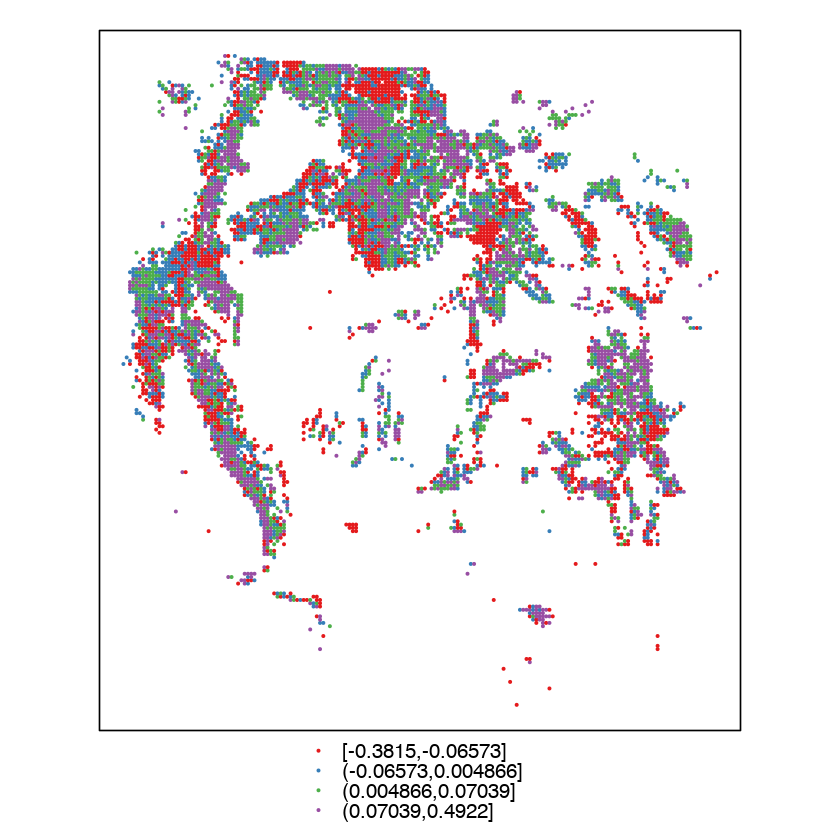

In [7]:
resids <- residuals(mod)
colours <- brewer.pal(4,"Set1")
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))
map.resids <- SpatialPointsDataFrame(data=data.frame(resids), coords=cbind(xy$x,xy$y)) 
spplot(map.resids, cuts=quantile(resids), col.regions=colours, cex=0.3) 